In [1]:
import pandas as pd

In [ ]:
# tsv 파일 로드
chipo = pd.read_csv("../../csv/num_1/chipotle.tsv", sep="\t")
chipo

1. order_id컬럼은 숫자의 의미를 가지지 않는 컬럼이기 때문에 문자형 변경
2. 가장 많이 주문한 item_name과 그 수량을 출력
3. item당 주문 총량을 구하고 바형 그래프로 시각화
4. item_price를 float의 형태로 변환
5. 주문당 평균 계산 금액 출력
6. 각 아이템의 가격을 출력한 후에 가격 분포 그래프 / 가격 히스토그램 출력
7. "Chicken Bowl"을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량 출력

In [6]:
## order_id 컬럼의 데이터를 문자열 변환
chipo["order_id"] = chipo["order_id"].astype(str)

In [10]:
## 가장 많이 주문한 item_name과 수량을 출력
# chipo.groupby("item_name").sum()["quantity"]
item_count =  chipo['item_name'].value_counts()

In [ ]:
## 가장 많이 주문한 item : top10 출력하려면?
item_count.head(10)

In [ ]:
item_count[:10]

In [13]:
## 주문 횟수가 가장 많은 메뉴를 출력
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

In [14]:
## item_name의 주문 총량
item_quantity = chipo.groupby("item_name").sum()["quantity"]

In [15]:
## 주문 총량을 바형 그래프로 출력
import matplotlib.pyplot as plt
import numpy as np

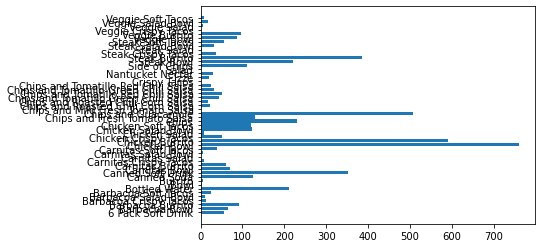

In [17]:
x = item_quantity.index
y = item_quantity

plt.barh(x, y)
plt.show()

In [25]:
## item_price 컬럼은 $ xx.xxx 
## float의 형태로 변환
## $ 삭제
## 타입을 float

# case1 
chipo['item_price'].str.replace("$", "").astype(float)

# case2
chipo["item_price"].str.lstrip('$').astype(float)

# case3
chipo["item_price"].apply(lambda x : float(x.replace("$", "")))

# case4
def change(x):
    result = float(x.replace("$", ""))
    return result

chipo["item_price"] = chipo["item_price"].apply(change)

In [26]:
chipo.describe()

quantity   item_price
count  4622.000000  4622.000000
mean      1.075725     7.464336
std       0.410186     4.245557
min       1.000000     1.090000
25%       1.000000     3.390000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000

In [27]:
# 각 아이템의 가격을 출력
chipo.head(10)

order_id  quantity                              item_name  \
0        1         1           Chips and Fresh Tomato Salsa   
1        1         1                                   Izze   
2        1         1                       Nantucket Nectar   
3        1         1  Chips and Tomatillo-Green Chili Salsa   
4        2         2                           Chicken Bowl   
5        3         1                           Chicken Bowl   
6        3         1                          Side of Chips   
7        4         1                          Steak Burrito   
8        4         1                       Steak Soft Tacos   
9        5         1                          Steak Burrito   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98  
6                                                NaN        1.69  
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...       11.75  
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...        9.25  
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...        9.25

In [34]:
## 수량이 1개인 데이터를 출력
chipo[chipo["quantity"] == 1]
chipo_one_item = chipo.query("quantity == 1")

In [36]:
## item_name을 기준으로 그룹화 하고 item_price의 최솟값을 구하면 아이템당 가격을 추출
price_per_item = chipo_one_item.groupby('item_name').min()

In [46]:
## item당 가격이 큰것부터 상위 10개를 출력?
price_per_item.sort_values('item_price', ascending=False).head(10)

price_per_item.sort_values('item_price', ascending=False)[:10]

order_id  quantity  \
item_name                                  
Steak Salad Bowl          1032         1   
Barbacoa Salad Bowl       1283         1   
Carnitas Salad Bowl       1035         1   
Carnitas Soft Tacos       1011         1   
Carnitas Crispy Tacos     1774         1   
Steak Soft Tacos          1054         1   
Carnitas Salad            1500         1   
Carnitas Bowl             1007         1   
Barbacoa Soft Tacos       1103         1   
Barbacoa Crispy Tacos      110         1   

                                                      choice_description  \
item_name                                                                  
Steak Salad Bowl                           [Fresh Tomato Salsa, Lettuce]   
Barbacoa Salad Bowl                      [Fresh Tomato Salsa, Guacamole]   
Carnitas Salad Bowl    [Fresh Tomato Salsa, [Rice, Black Beans, Chees...   
Carnitas Soft Tacos    [Fresh Tomato Salsa (Mild), [Black Beans, Rice...   
Carnitas Crispy Tacos  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...   
Steak Soft Tacos       [Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]   
Carnitas Salad         [[Fresh Tomato Salsa (Mild), Roasted Chili Cor...   
Carnitas Bowl          [Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...   
Barbacoa Soft Tacos    [Fresh Tomato Salsa, [Black Beans, Cheese, Let...   
Barbacoa Crispy Tacos                    [Fresh Tomato Salsa, Guacamole]   

                       item_price  
item_name                          
Steak Salad Bowl             9.39  
Barbacoa Salad Bowl          9.39  
Carnitas Salad Bowl          9.39  
Carnitas Soft Tacos          8.99  
Carnitas Crispy Tacos        8.99  
Steak Soft Tacos             8.99  
Carnitas Salad               8.99  
Carnitas Bowl                8.99  
Barbacoa Soft Tacos          8.99  
Barbacoa Crispy Tacos        8.99

In [ ]:
## 아이템 가격 분포 그래프 출력
## 바형 그래프 
x = price_per_item.index
x_pos = np.arange(len(x))
y = price_per_item['item_price']

plt.bar(x_pos, y)
plt.show()

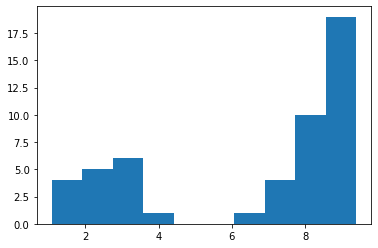

In [44]:
## 히스토그램 출력
plt.hist(y)
plt.show()

In [55]:
# "chicken bowl"을 2개 이상 주문한 고객들의 'chicken bowl' 메뉴의 총 주문 수량

## chicken bowl 만 출력
chipo_chicken = chipo[chipo["item_name"] == 'Chicken Bowl']

In [56]:
len(chipo_chicken)

726

In [51]:
## order_id를 기준으로 그룹화 하여 주문 수량 합계를 출력
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()["quantity"]

In [52]:
len(chipo_chicken_ordersum)

615

In [ ]:
chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]